In [59]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# constant parameters of the thruster positions
a = 15/100
c = 15/100
d = 15/100
e = 15/100

num_thrusters = 7
ndof = 6 

In [61]:
# functions
def thrust_mapper_matrix(alpha, b):
    TMM = np.array([[np.cos(alpha), np.cos(alpha), -np.cos(alpha), -np.cos(alpha), 0, 0, 0],
                        [np.sin(alpha), -np.sin(alpha), np.sin(alpha), -np.sin(alpha), 0, 0, 0],
                        [0, 0, 0, 0, 1, 1, 1],
                        [0, 0, 0, 0, -c, c, 0],
                        [0, 0, 0, 0, -b, -b, a],
                        [d*np.cos(alpha) + e*np.sin(alpha), -d*np.cos(alpha) - e*np.sin(alpha), 
                         -d*np.cos(alpha) - e*np.sin(alpha), d*np.cos(alpha) + e*np.sin(alpha), 0, 0, 0]])
    return TMM

def get_unit_thruster_forces(alpha,b):
    TMM = thrust_mapper_matrix(alpha, b)
    return np.linalg.pinv(TMM) @ np.eye(6)


In [62]:
# computation of thruster forces while varying alpha
alpha_initial = 0
alpha_final = 90

alpha = np.linspace(alpha_initial, alpha_final, 10)
alpha = np.deg2rad(alpha)

unit_thruster_forces = np.zeros((alpha.size ,num_thrusters, ndof))

for i in range(alpha.size):

    unit_thruster_forces[i,:,:] = get_unit_thruster_forces(alpha[i], b = 7.5/100)



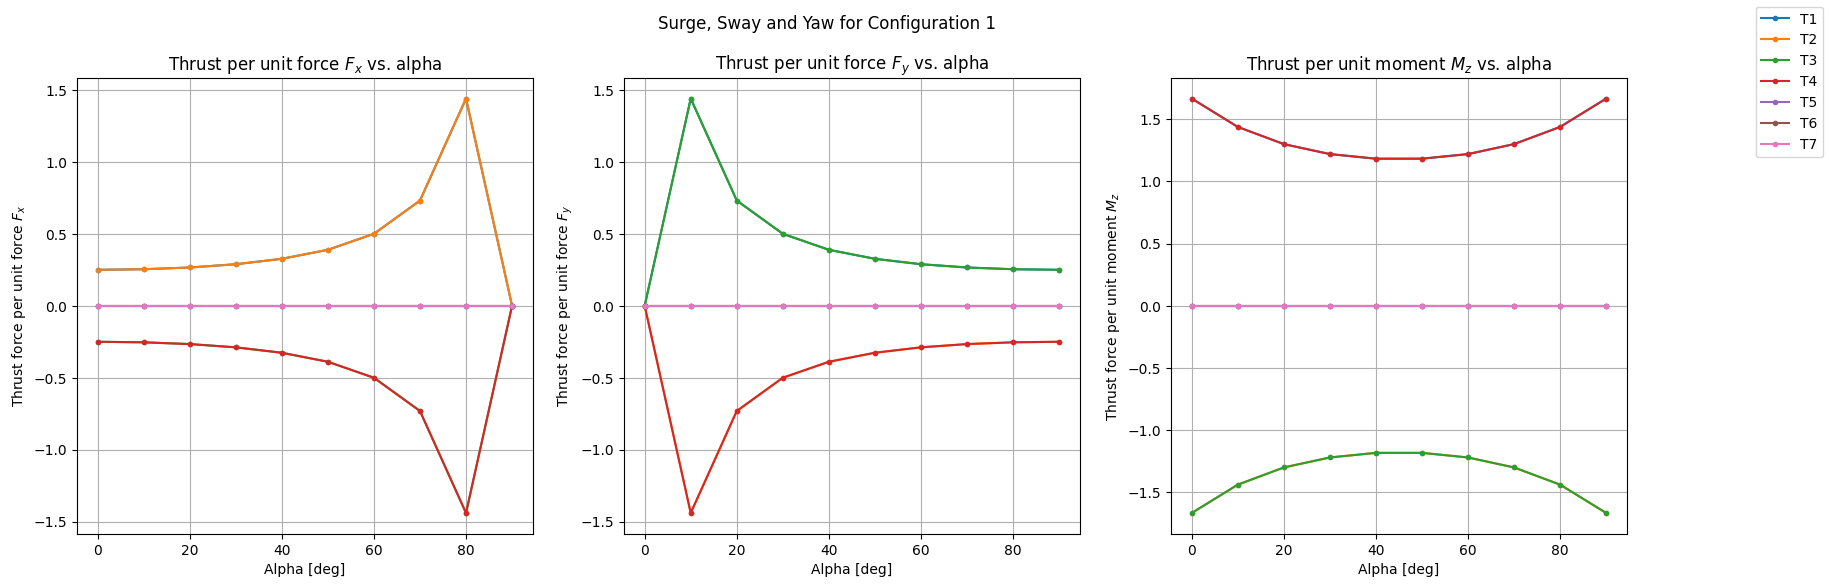

In [63]:
fig1, axs = plt.subplots(1,3)

dof = [0,1,5]
generalized_forces_txt = ['force $F_{x}$', 'force $F_{y}$', 'moment $M_{z}$']

for k, dof in enumerate(dof):
    for j in range(num_thrusters):
        axs[k].plot(np.rad2deg(alpha), unit_thruster_forces[:,j,dof], '.-', linewidth=1.5)
        axs[k].grid()
        axs[k].title.set_text("Thrust per unit " + generalized_forces_txt[k] + " vs. alpha")
        axs[k].set_xlabel("Alpha [deg]")
        axs[k].set_ylabel("Thrust force per unit " + generalized_forces_txt[k])
        axs[k].set_box_aspect(1)

fig1.legend(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'])
fig1.suptitle('Surge, Sway and Yaw for Configuration 1')
fig1.set_size_inches(20,6)



In [64]:
# computation of thruster forces while varying alpha
alpha = np.deg2rad(45)
b_initial = 0
b_final = 15

b = np.linspace(b_initial, b_final, 10)/100

unit_thruster_forces = np.zeros((b.size ,num_thrusters, ndof))

for i in range(b.size):

    unit_thruster_forces[i,:,:] = get_unit_thruster_forces(alpha, b[i])


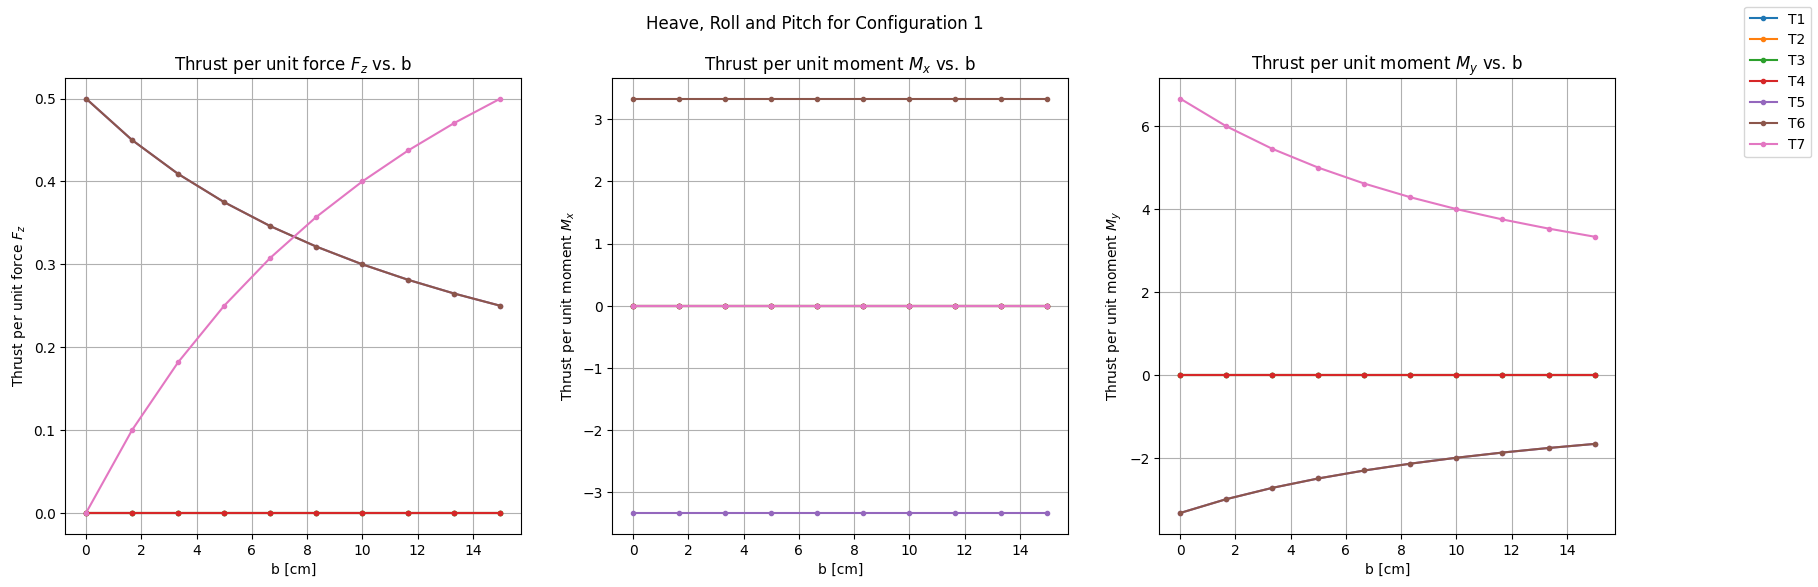

In [65]:
dof = [2,3,4]
generalized_forces_txt = ['force $F_{z}$', 'moment $M_{x}$', 'moment $M_{y}$']

fig2, axs = plt.subplots(1,3)

for k, dof in enumerate(dof):
    for j in range(num_thrusters):
        axs[k].plot(b*100, unit_thruster_forces[:,j,dof], '.-', linewidth=1.5)
        axs[k].grid()
        axs[k].title.set_text("Thrust per unit " +  generalized_forces_txt[k] + " vs. b")
        axs[k].set_xlabel("b [cm]")
        axs[k].set_ylabel("Thrust per unit " + generalized_forces_txt[k])
        axs[k].set_box_aspect(1)

fig2.legend(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'])
fig2.suptitle('Heave, Roll and Pitch for Configuration 1')
fig2.set_size_inches(20,6)
